# Prediction of activity with PCA

In [117]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [8]:
df = pd.read_csv('pcafilewlabels.csv', header = None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.555856,0.000025,0.000419,0.000038,-0.000716,-0.000726,0.001239,-0.000194,0.002798,0.012813,...,0.001206,0.000655,0.000001,-0.000071,-0.000121,-0.000157,-0.000213,-0.000554,p1,a01
1,-0.556310,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,0.001149,0.000652,-0.000043,-0.000076,-0.000117,-0.000103,-0.000173,-0.000490,p1,a01
2,-0.555609,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,0.000851,0.000605,-0.000239,-0.000013,-0.000219,-0.000058,-0.000412,-0.000616,p1,a01
3,-0.555990,0.000029,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012732,...,0.001167,0.000664,-0.000019,-0.000037,-0.000138,-0.000130,-0.000105,-0.000490,p1,a01
4,-0.555658,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,0.001020,0.000639,-0.000154,-0.000130,-0.000097,-0.000048,-0.000214,-0.000560,p1,a01


The above dataframe consists of 9120 observations with 30 most valued features according to the `PCA`, and then there are the labels `patient` and `activity`.

In [121]:
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.555856,0.000025,0.000419,0.000038,-0.000716,-0.000726,0.001239,-0.000194,0.002798,0.012813,...,0.001206,0.000655,0.000001,-0.000071,-0.000121,-0.000157,-0.000213,-0.000554,0,0
1,-0.556310,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,0.001149,0.000652,-0.000043,-0.000076,-0.000117,-0.000103,-0.000173,-0.000490,0,0
2,-0.555609,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,0.000851,0.000605,-0.000239,-0.000013,-0.000219,-0.000058,-0.000412,-0.000616,0,0
3,-0.555990,0.000029,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012732,...,0.001167,0.000664,-0.000019,-0.000037,-0.000138,-0.000130,-0.000105,-0.000490,0,0
4,-0.555658,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,0.001020,0.000639,-0.000154,-0.000130,-0.000097,-0.000048,-0.000214,-0.000560,0,0


Just like how we did LabelEncoding last time,  same has been carried on.

In [150]:
X2 = df.iloc[:,30:32]
X2 = X2.apply(LabelEncoder().fit_transform)

In [191]:
X = X_t.iloc[:,0:30]
y = X_t[31]

In [40]:
len(X)

9120

Splitting the dataset into training with 75% of the data, and test with 25% of the data.

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 451)

## Dumb models, Less than 85 % accuracy.

### 1. Logistic Regression

In [111]:
model = LogisticRegression(penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.454824561404


### 2. Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.685087719298


### 3. kNN

In [157]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.776754385965


In [154]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

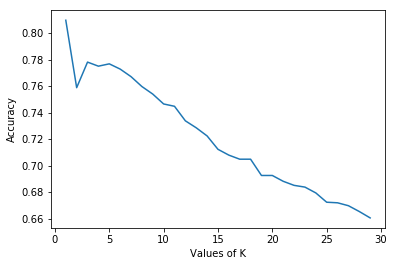

In [155]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

In [158]:
from sklearn.model_selection import GridSearchCV
k_values = [i for i in range(2,5)]
param_grid = {'weights':('uniform', 'distance'), 'n_neighbors':k_values}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ('uniform', 'distance'), 'n_neighbors': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [159]:
print(grid.best_score_)
print(grid.best_params_)

0.765460526316
{'n_neighbors': 2, 'weights': 'distance'}


### 4. Decision Tree

In [161]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.766228070175


### 5. MLP with best accuracy, 81.92%, 'Adam' Optimizer, 'ReLU' activation.

In [149]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 600, solver='adam', activation='relu')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.819298245614


### Bagging Classifier

In [94]:
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.83201754386


## Better models, models with accuracy > 85%

### 1. Random Forest Classifier

In [93]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.859649122807


### 2. Gradient Boosting Classifier

In [165]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.874561403509


### 3. Extra trees Classifier

In [92]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.876754385965


# Analysis with Neural Networks

### MLP with 'Adam' Optimizer, converged within 500 iterations and has better accuracy of 80.65%

In [151]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.806578947368


In [170]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 600, solver='adam', activation='logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.777192982456


### MLP with 'SGD' Optimizer, converged within 1000 iterations and has bad accuracy of 30.92%

In [164]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 1000, solver = 'sgd')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.309210526316


In [196]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 1000, solver='sgd', activation='logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.192543859649


/home/greed/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


# Prediction of patient with activity.

In [174]:
X = X_t.iloc[:, 0:30].join(X_t[31])
y = X_t[30]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 451)

In [181]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.568859649123


In [182]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.55350877193


In [183]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.674122807018


In [184]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.590789473684


In [185]:
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.64298245614


In [186]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.581140350877
